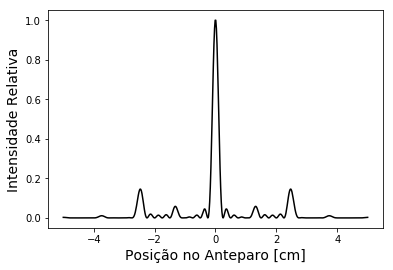

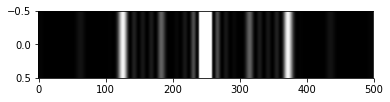

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from gaussxw import gaussxwab

########################################
#--Este programa, dado os parâmetros---#
#--abaixo, entrega uma visualização----#
#--unidimensional e bidimensional------#
#--do padrão de interferência de uma---#
#--grade de difração.------------------#
########################################

# N:     Número de fendas
# lambd: Comprimento de onda
# f:     Distância focal
# L:     Tamanho da tela
# d:     Espaçamento entre fendas
# w:     Tamanho total da grade de difração

N     = 10
lambd = 500e-9      #[m]
f     = 1           #[m]
L     = 10e-2       #[m]
d     = 20e-6       #[m]
w     = N*d         #[m]

# Função de transmissão da grade de difração
def q(u,d):
    return (np.sin(u*(np.pi/d))*np.sin(u*(np.pi/(2*d))))**2

#################################################
#--O padrão de interferência é a Transformada---#
#--de Fourier da raiz da função de transmissão--#
#-----------------------------------------------#
#--Para otimizar a função, os parâmetros para---#
#--a integração por quadratura gaussiana foram--#
#--calculados fora da função e entregues como --#
#--argumentos.----------------------------------#
#################################################

def I_patt(x,lambd,f,d,w,u,p):
    i = complex(0,1)
    s = 0.0
    for k in range(n):
        s += p[k]*np.sqrt(q(u[k],d))*np.exp(i*2*np.pi*x*u[k]/(lambd*f))
    return abs(s)**2

n   = 500
u,p = gaussxwab(n, -w/2, w/2)

x = np.linspace(-L/2, L/2, 500)
I = I_patt(x,lambd,f,d,w,u,p)/max(I_patt(x,lambd,f,d,w,u,p))

plt.plot(x*1e2, I, '-k')
plt.xlabel('Posição no Anteparo [cm]', size = 14)
plt.ylabel('Intensidade Relativa', size = 14)
plt.savefig('im_5_19c1', dpi = 300)
plt.show()

plt.imshow((I,), aspect = 4*len(x)/20, cmap='gray', vmax = 0.15, interpolation = 'gaussian')
plt.savefig('im_5_19c2', dpi = 300)
plt.show()